In [56]:
!pip install opencv-python


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\world\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Discrete Cosine Transform

This notebook is for the sole purpose of understanding and playing around with the discreet cosine transform

In [57]:
import sys
sys.path.append("../")

In [58]:
from src.DCT import DCT
from src.quantizer import Quantizer
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
base_12 = DCT.get_base(1,2)
base_12

array([[ 0.90612745,  0.37533028, -0.37533028, -0.90612745, -0.90612745,
        -0.37533028,  0.37533028,  0.90612745],
       [ 0.76817776,  0.31818965, -0.31818965, -0.76817776, -0.76817776,
        -0.31818965,  0.31818965,  0.76817776],
       [ 0.51327997,  0.21260752, -0.21260752, -0.51327997, -0.51327997,
        -0.21260752,  0.21260752,  0.51327997],
       [ 0.18023996,  0.07465783, -0.07465783, -0.18023996, -0.18023996,
        -0.07465783,  0.07465783,  0.18023996],
       [-0.18023996, -0.07465783,  0.07465783,  0.18023996,  0.18023996,
         0.07465783, -0.07465783, -0.18023996],
       [-0.51327997, -0.21260752,  0.21260752,  0.51327997,  0.51327997,
         0.21260752, -0.21260752, -0.51327997],
       [-0.76817776, -0.31818965,  0.31818965,  0.76817776,  0.76817776,
         0.31818965, -0.31818965, -0.76817776],
       [-0.90612745, -0.37533028,  0.37533028,  0.90612745,  0.90612745,
         0.37533028, -0.37533028, -0.90612745]])

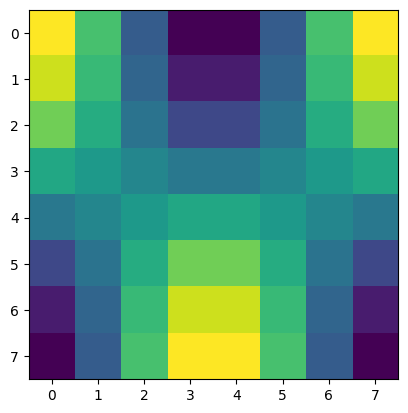

In [60]:
plt.imshow(base_12)

In [61]:
basis = DCT.get_basis()

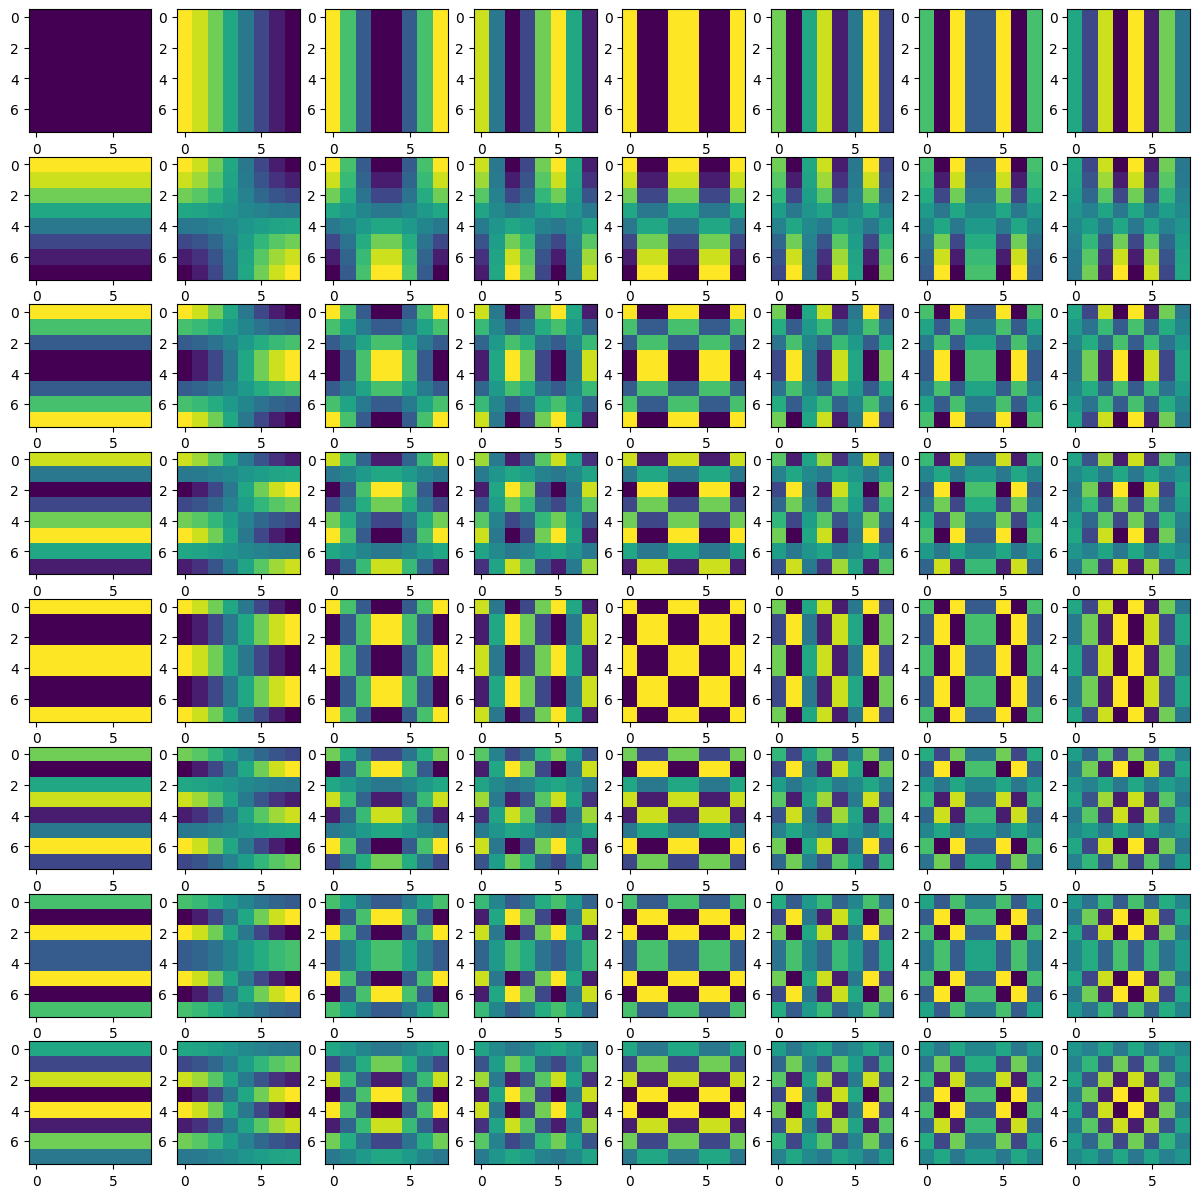

In [62]:
fig, ax = plt.subplots(8,8, figsize=(15,15))


for i in range(8):
    for j in range(8):
        ax[i, j].imshow(basis[i][j])
plt.show()

In [63]:
import cv2

In [64]:
img = cv2.imread("B2DBy.jpg")

In [65]:
import scipy

In [66]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [67]:
img_gray = img_gray[0:296, 0:328]

In [68]:
img_gray.shape

(296, 328)

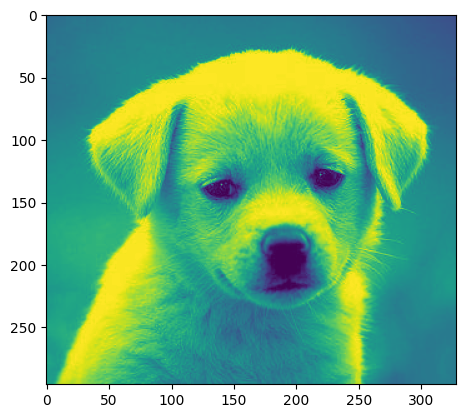

In [69]:
plt.imshow(img_gray)

In [70]:
fig_dct = DCT.DCT(img_gray[:296,:328])

In [71]:
fig_dct.shape

(296, 328)

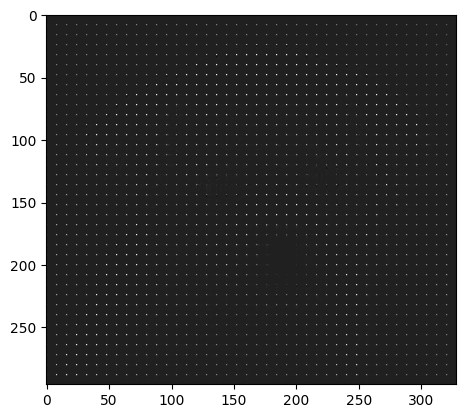

In [72]:
plt.imshow( fig_dct, cmap="gray")

In [73]:
fig_dct

array([[ 9.10000000e+01, -5.10041293e-01,  4.55535393e-01, ...,
        -4.30419819e-02,  9.85725634e-02,  5.00724809e-03],
       [-1.05702092e+00, -1.49282760e-02, -1.71520841e-02, ...,
         3.27509679e-02, -2.34581423e-02,  1.78226919e-02],
       [-8.45618906e-03,  1.95170337e-02,  3.77220869e-02, ...,
        -3.55186827e-04,  6.89720869e-02, -2.24466558e-02],
       ...,
       [ 5.84562844e-02, -7.46096043e-02, -2.69949119e-02, ...,
         2.47710250e-02,  5.09464010e-03,  6.01212354e-02],
       [-2.44155685e-02, -2.88046987e-03, -4.41941738e-02, ...,
         1.39751666e-01,  4.79854346e-02, -5.37720495e-02],
       [ 5.10900940e-02,  4.51929594e-02,  2.95641051e-02, ...,
        -2.88712354e-02, -7.74479661e-02,  1.52013769e-01]])

In [77]:
Q = Quantizer()

In [78]:
fig_quantized = Q.Low_compression(fig_dct)

AttributeError: 'Quantizer' object has no attribute 'Low_compression_table'

In [ ]:
plt.imshow( fig_dct, cmap="gray")

In [ ]:
idct = DCT.IDCT(fig_dct)

In [ ]:
idct[4:, 4: ] /= 3

In [ ]:
plt.imshow(img_gray, cmap="gray")

In [ ]:
plt.imshow(idct, cmap="gray")

In [ ]:
import numpy as np

In [ ]:
def img2vector(img:np.array)->np.array:
    rows, cols = img.shape
    vector = np.array([])

    for d in range(rows+cols-1):
      if d%2 == 0:
         d1 = d 
         d2 = 0
         limit = d +1
         if d>(rows-1):
            d1 = rows - 1
            d2 = d - d1
            limit = d1-d2+1
         for i in range(limit):
            vector = np.append(vector, img[d1, d2])
            d1 = d1 -1
            d2 = d2 +1
            
      else:
         d1 = 0 
         d2 = d
         limit = d+1

         if d>rows-1:
            print("here")
            d2 = rows - 1
            d1 = d - d2
            limit = d2-d1 +1

         for i in range(limit):
            print(i,d1,d2)
            vector = np.append(vector, img[d1, d2])
            d1 += 1
            d2 -= 1         
    
    return vector

In [ ]:
def vector2img(vector:np.array, img_shape):
    rows, cols = img_shape
    img = np.zeros((rows,cols))
    curr_index = 0
    
    for d in range(rows+cols-1):
        d1 = d%rows + d//rows
        d2 = d-d1
        diff = np.abs(d1-d2)

        if d%2 != 0 & d1>=d2:
                d1, d2 = d2, d1

        for i in range(0,diff+1):
            if d1>=d2:
                img[d1-i][d2+i] = vector[curr_index] 
            else:
                img[d1+i][d2-i] = vector[curr_index]

            curr_index += 1
    
    return img
        

In [ ]:
img = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25]])

In [ ]:
v = img2vector(img)